# Use Gender to Predict User Purchase from Social Media Ad

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree 

from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

## Data Analysis of Gender Feature

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]
----------------------------------------------------------
count        400
unique         2
top       Female
freq         204
Name: Gender, dtype: object


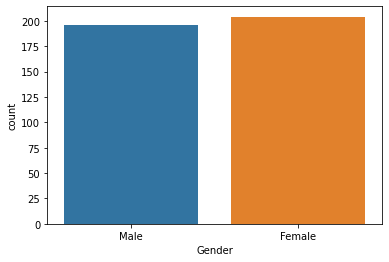

In [2]:
data = pd.read_csv('Social_Network_Ads.csv')
print(data)

print('----------------------------------------------------------')

#Data about Gender Column
print(data['Gender'].describe())

sns.countplot(data = data, x = 'Gender')

In [3]:
df = data.copy()
df['Gender'] = [1 if i == 'Male' else 0 for i in df['Gender']]
print(df)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510       1   19            19000          0
1    15810944       1   35            20000          0
2    15668575       0   26            43000          0
3    15603246       0   27            57000          0
4    15804002       1   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863       0   46            41000          1
396  15706071       1   51            23000          1
397  15654296       0   50            20000          1
398  15755018       1   36            33000          0
399  15594041       0   49            36000          1

[400 rows x 5 columns]


In [4]:
#Split data
X_training_gender, X_testing_gender, y_training_gender, y_testing_gender = train_test_split(df['Gender'], df['Purchased'], test_size = 0.15, random_state = 0)

## Perceptron for Gender

Accuracy of Perceptron Model: 0.48333333333333334


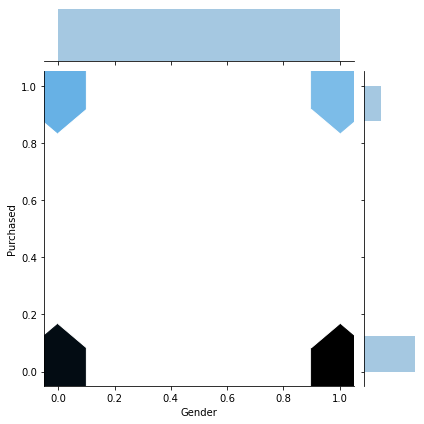

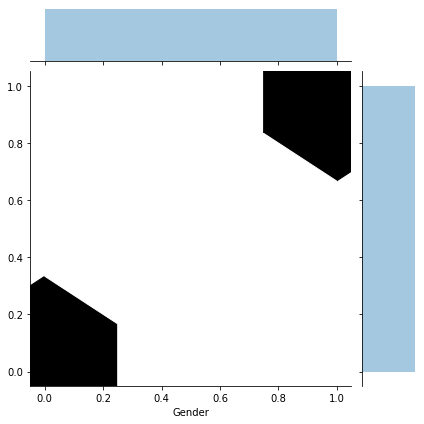

In [5]:
perceptron_classifier_gender = Perceptron(random_state = 0)
perceptron_classifier_gender.fit(X_training_gender.values.reshape(-1, 1), y_training_gender)
perceptron_prediction_gender = perceptron_classifier_gender.predict(X_testing_gender.values.reshape(-1, 1))

#Colors demonstrate the concentration. Light (less) -> Dark (more)
sns.jointplot(x = X_testing_gender, y = y_testing_gender, data = df, kind = 'hex')
sns.jointplot(x = X_testing_gender, y = perceptron_prediction_gender, data = df, kind = 'hex')

#Used instead of score to quantify the quality of classification predictions
print('Accuracy of Perceptron Model: {}'.format(accuracy_score(y_testing_gender, perceptron_prediction_gender)))

## Logistic Regression for Gender

Accuracy of SVM Model: 0.75


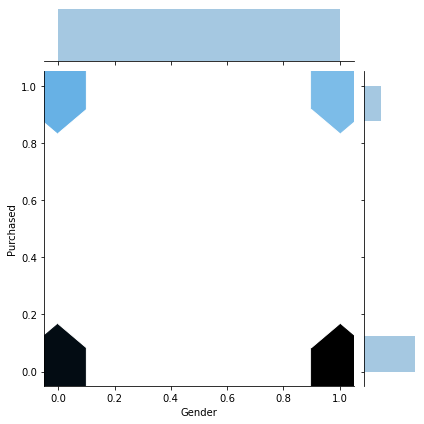

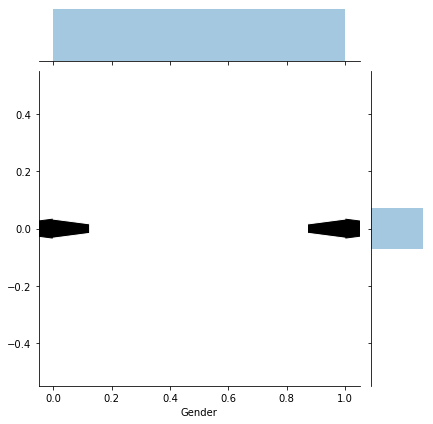

In [6]:
log_reg_gender = LogisticRegression(random_state = 0)

log_reg_gender.fit(X_training_gender.values.reshape(-1, 1), y_training_gender)
lr_prediction_gender = log_reg_gender.predict(X_testing_gender.values.reshape(-1, 1))

sns.jointplot(x = X_testing_gender, y = y_testing_gender, data = df, kind = 'hex')
sns.jointplot(x = X_testing_gender, y = lr_prediction_gender, data = df, kind = 'hex')

#Used instead of score to quantify the quality of classification predictions
print('Accuracy of SVM Model: {}'.format(accuracy_score(y_testing_gender, lr_prediction_gender)))

## SVM for Gender

Accuracy of SVM Model: 0.75


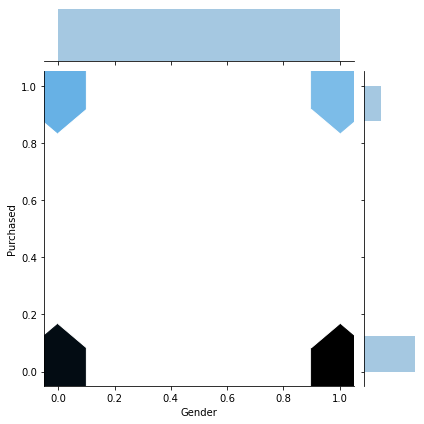

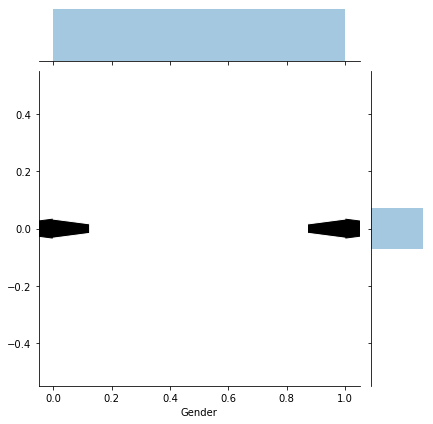

In [7]:
svm_classifier_gender = SVC(kernel = 'linear', random_state = 0)
svm_classifier_gender.fit(X_training_gender.values.reshape(-1, 1), y_training_gender)
svm_prediction_gender = svm_classifier_gender.predict(X_testing_gender.values.reshape(-1, 1))

#Show density of tested set and prediction
sns.jointplot(x = X_testing_gender, y = y_testing_gender, data = df, kind = 'hex')
sns.jointplot(x = X_testing_gender, y = svm_prediction_gender, data = df, kind = 'hex')

#Used instead of score to quantify the quality of classification predictions
print('Accuracy of SVM Model: {}'.format(accuracy_score(y_testing_gender, svm_prediction_gender)))

## Decision Tree for Gender

Accuracy of Decision Tree Model: 0.75


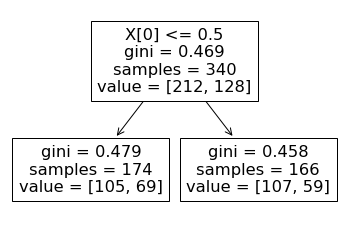

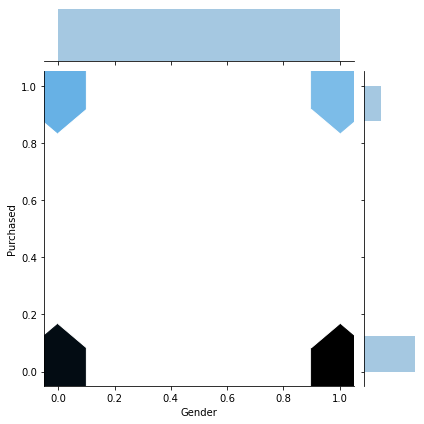

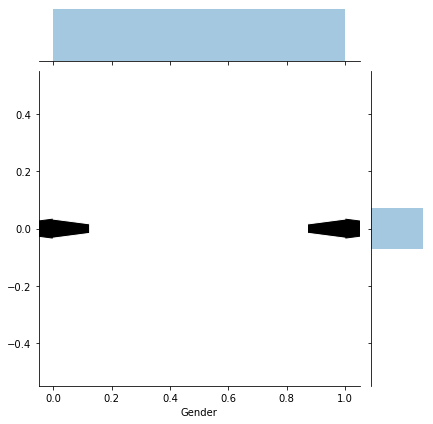

In [8]:
#gini split default
dt_classifier_gender = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
dt_classifier_gender.fit(X_training_gender.values.reshape(-1, 1), y_training_gender)
dt_prediction_gender = dt_classifier_gender.predict(X_testing_gender.values.reshape(-1, 1))

tree.plot_tree(dt_classifier_gender)

#Show density of tested set and prediction
sns.jointplot(x = X_testing_gender, y = y_testing_gender, data = df, kind = 'hex')
sns.jointplot(x = X_testing_gender, y = dt_prediction_gender, data = df, kind = 'hex')

#Used instead of score to quantify the quality of classification predictions
print('Accuracy of Decision Tree Model: {}'.format(accuracy_score(y_testing_gender, dt_prediction_gender)))